### **Introduction to Artificial Neural Networks - Gradient Descent**



### <font color="blue">Setting up a virtual environement for Deep Learning</font> 

Often times in Python (similar to R) the best way to sync the packages that one needs is to create a <font color='purple'>**new installation**</font>. On **Mac** and using **Anaconda**, the steps are

1) Create a **new environment** with the version of Python and the main packages you want, e.g.

<font color='darkpink'> conda create -n DSML_TF python=3.7 tensorflow numpy pandas scipy scikit-learn statsmodels matplotlib seaborn jupyterlab python-graphviz
 </font>

2) Then **activate** the environment DSML **before** starting your Jupyter Lab/Notebook 

<font color='darkpink'> conda activate DSML_TF </font>

Or if you need to install an additional package, before activate the environment, you might install *pydot*

<font color='darkpink'> conda install -c anaconda pydot </font>  

(_or perhaps_: <font color='darkpink'>conda install -c conda-forge pydot</font> )

3) When you are done deactivate the environment - only one is active at any point, so Anacond knows what to do:

<font color='darkpink'> conda deactivate </font>

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Setup

Let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [ ]:
## Scikit-Learn ≥0.20 is required - do NOT comment out, it's used in TF!!!
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

### --- To be able to use scikit-learn (SKL) for hyperparameter tunning, downgrade the SKL version 

Activate your environment and install an older version:

<font color='darkpink'> conda activate AML_TF

<font color='darkpink'> conda install scikit-learn==0.21.2  </font>

In [ ]:
sklearn.__version__  # was: '0.23.2'

'1.0.2'

In [ ]:
# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [ ]:
# Tree plotting
import pydot
from IPython.display import Image
import graphviz
from io import StringIO  

In [ ]:
### Some Python practice

### Gradient Descent (HOML, Chap 4)

#### Linear Regression - the Normal Equations

In [ ]:
# np.random.rand?

In [ ]:
# Generate data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

(0.0, 2.0, 0.0, 15.0)

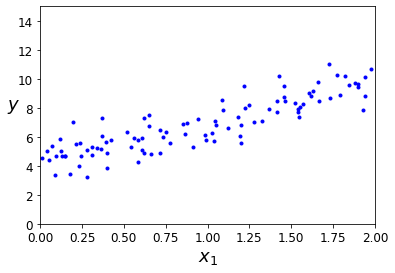

In [ ]:
# plot
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

In [ ]:
# Solution of the normal equations

$$ \hat\theta = (X^T X)^{-1} X^Ty $$

In [ ]:
# We need to add a column of 1s for the intercept (bias) - the new name of X is thus X_b
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

#### Batch Gradient Descent

In [ ]:
## The gradient for the MSE is 

$$  \nabla f = \frac{2}{m} X^T (X\theta - y) $$

In [ ]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

In [ ]:
# https://github.com/ageron/handson-ml2/blob/master/extra_gradient_descent_comparison.ipynb

In [ ]:
#=== Illustrate the importance of the *learnign rate* for the converegence of the method

In [ ]:
# Define 2 points on the LS regression line - use them to plot it
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

In [ ]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        # plot the first 10 approximations from GD
        if iteration < 10:   
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


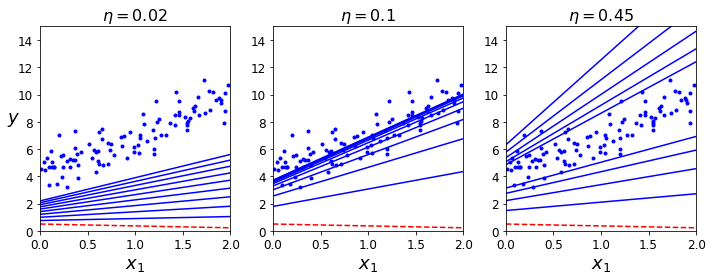

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization of intercept & slope - plot in red

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.45)

save_fig("gradient_descent_plot")
plt.show()

### <font color='blue'>Extra (Chap 4)</font> - Stochastic Gradient Descent

In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


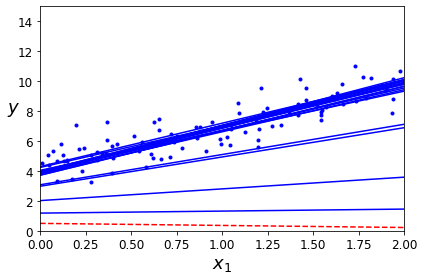

In [ ]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

# With this function the learnign rate (LR) is changed at each iteration
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

In [ ]:
theta

array([[4.21076011],
       [2.74856079]])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

### Mini-batch gradient descent

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [ ]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


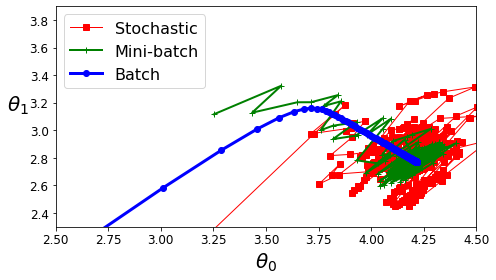

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

### <font color='blue'>Perceptron</font>

In [ ]:
# Create a grid in [60, 78] with step=0.1 
np.arange(60, 78, 0.1)

array([60. , 60.1, 60.2, 60.3, 60.4, 60.5, 60.6, 60.7, 60.8, 60.9, 61. ,
       61.1, 61.2, 61.3, 61.4, 61.5, 61.6, 61.7, 61.8, 61.9, 62. , 62.1,
       62.2, 62.3, 62.4, 62.5, 62.6, 62.7, 62.8, 62.9, 63. , 63.1, 63.2,
       63.3, 63.4, 63.5, 63.6, 63.7, 63.8, 63.9, 64. , 64.1, 64.2, 64.3,
       64.4, 64.5, 64.6, 64.7, 64.8, 64.9, 65. , 65.1, 65.2, 65.3, 65.4,
       65.5, 65.6, 65.7, 65.8, 65.9, 66. , 66.1, 66.2, 66.3, 66.4, 66.5,
       66.6, 66.7, 66.8, 66.9, 67. , 67.1, 67.2, 67.3, 67.4, 67.5, 67.6,
       67.7, 67.8, 67.9, 68. , 68.1, 68.2, 68.3, 68.4, 68.5, 68.6, 68.7,
       68.8, 68.9, 69. , 69.1, 69.2, 69.3, 69.4, 69.5, 69.6, 69.7, 69.8,
       69.9, 70. , 70.1, 70.2, 70.3, 70.4, 70.5, 70.6, 70.7, 70.8, 70.9,
       71. , 71.1, 71.2, 71.3, 71.4, 71.5, 71.6, 71.7, 71.8, 71.9, 72. ,
       72.1, 72.2, 72.3, 72.4, 72.5, 72.6, 72.7, 72.8, 72.9, 73. , 73.1,
       73.2, 73.3, 73.4, 73.5, 73.6, 73.7, 73.8, 73.9, 74. , 74.1, 74.2,
       74.3, 74.4, 74.5, 74.6, 74.7, 74.8, 74.9, 75

In [ ]:
np.random.seed(1)

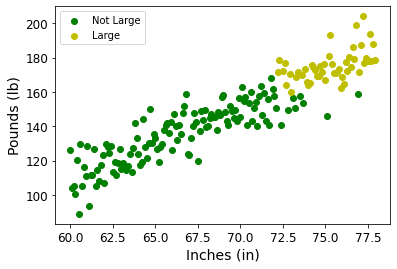

In [ ]:
## Generate data

def plot_customers(X, y, xlabel='Inches (in)', ylabel='Pounds (lb)'): 
    colors = ['g', 'y']
    labels = ['Not Large', 'Large']
    for i, (color, label) in enumerate(zip(colors, labels)):
        plt.scatter(X[:,0][y == i], X[:,1][y == i], color=color, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
# Create linearly separated dataset
inches = np.arange(60, 78, 0.1)
random_fluctuations = np.random.normal(scale=10, size=inches.size) 
pounds = 4 * inches - 130 + random_fluctuations

X = np.array([inches, pounds]).T
y = ((X[:,0] > 72) & (X[:,1] > 160)).astype(int)

plot_customers(X,y)
plt.legend()
plt.show()

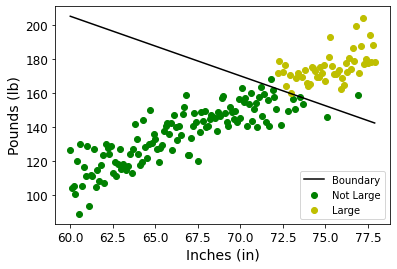

In [ ]:
# Add a separating line

def boundary(inches): 
    return  -3.5 * inches + 415
plt.plot(X[:,0], boundary(X[:,0]), color='k', label='Boundary') 
plot_customers(X, y)
plt.legend()
plt.show()

In [ ]:
## Add a linear classfier and it's "accuracy" (f1)

from sklearn.metrics import f1_score
y_pred = []

for inches, lbs in X:
    prediction = int(lbs > -3.5 * inches + 415) # above the boudary is lighter green
    y_pred.append(prediction)

f_measure = f1_score(y_pred, y)
print(f'The f-measure is {f_measure:.2f}')

The f-measure is 0.97


In [ ]:
## classification table

d = pd.DataFrame({'pred': y_pred, 'actual': y})
pd.crosstab(d.pred, d.actual)

actual,0,1
pred,,
0,127,0
1,3,50


In [ ]:
### Perceptron

In [ ]:
# (1) Given the boundary (weights), create the classifier
weights = np.array([3.5, 1, -415])

def linear_classifier(X, weights):
    M = np.column_stack([X, np.ones(X.shape[0])])
    return (M @ weights > 0).astype(int)

predictions = linear_classifier(X, weights)
assert predictions.tolist() == y_pred

In [ ]:
# Now, determine the weights iteratively

# https://en.wikipedia.org/wiki/Perceptron

In [ ]:
def predict(v, weights): 
    return int(v @ weights > 0)

In [ ]:
def get_bias_shift(predicted, actual, learning_rate=0.1): 
    return learning_rate * (predicted - actual)

In [ ]:
# (2) Perceptron algorithm

np.random.seed(0)

def train(X, y, predict=predict, adaptive_lr=1):
    M = np.column_stack([X, np.ones(X.shape[0])])
    weights = np.random.normal(size=X.shape[1] + 1)
    f_measures = []
    
    num = N
    for k in range(1, num):
        y_pred = linear_classifier(X, weights)
        f_measures.append(f1_score(y_pred, y))
        
        for i, actual in enumerate(y):
            predicted = predict(M[i], weights)
            bias_shift = get_bias_shift(predicted, actual)
            delta = bias_shift * M[i]
            if adaptive_lr:
                 delta /= k
            weights -=  delta  # weights = weights - delta
            
            #if ((k in [1,2,3]) or (k==num-1)) and i>145:
            #    print("iter:",k, "obs#:",i, weights)
        #if ((k in [1,2,3]) or (k==num-1)):
        #    print(75*"=")
    return weights, f_measures

N = 1000
weights, f_measures = train(X, y, adaptive_lr=0)

print(f'The f-measure after {N} iterations is {f_measures[-1]:.2f}') 

The f-measure after 1000 iterations is 0.62


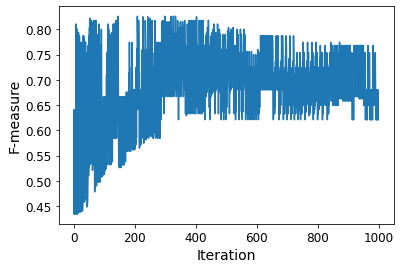

In [ ]:
plt.plot(range(len(f_measures)), f_measures)
plt.xlabel('Iteration')
plt.ylabel('F-measure')
plt.show()

In [ ]:
# Use adaptive LR

weights, f_measures = train(X, y, adaptive_lr=1)
print(f'The f-measure after 1000 iterations is {f_measures[-1]:.2f}') 

The f-measure after 1000 iterations is 0.81


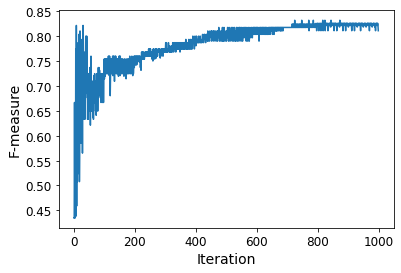

In [ ]:
plt.plot(range(len(f_measures)), f_measures)
plt.xlabel('Iteration')
plt.ylabel('F-measure')
plt.show()

In [ ]:
### Compare the linear separator from the perceptron to the optimal one

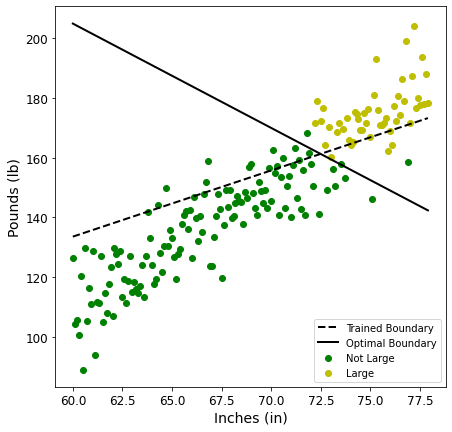

In [ ]:
inches_coef, lbs_coef, bias = weights

def new_boundary(inches):
    return -(inches_coef * inches + bias) / lbs_coef

fig, ax = plt.subplots(figsize=(7, 7))
#ax.set_aspect(1/6.5)

plt.plot(X[:,0], new_boundary(X[:,0]), color='k', linestyle='--', label='Trained Boundary', linewidth=2)
plt.plot(X[:,0], boundary(X[:,0]), color='k', label='Optimal Boundary', linewidth=2)

plot_customers(X, y)
plt.legend()
plt.show()